<figure>
  <IMG SRC="logo-statistics-horizontal-maroon-box-black-1.png" WIDTH=200 ALIGN="right">
</figure>

# STAT 650 - Midterm Project Guidelines
*Developed by Yoonsung Jung*

## 1. Guideline of Requirements

- Submit three files including .ipynb file, excel data file and .html file for your final .ipynb  


## 2. Evaluation Criteria

Your project will be evaluated using the following criteria:

- Your raw dataset must contain at least 5 columns including at least 2 categorical and 3 quantitative variables (5 pts)
- Your raw dataset must include 100 rows of data or more. (5 pts)
- You must ask and answer at least 3 questions about the dataset. (10 + 20 pts = 30 pts)
- Your must run EDA approaches and include at least 4 or more visualizations (graphs and tables) (25 pts)
    - Each question must have at least one visualization 
    - Your submission must include explanations using markdown cells, apart from the code.
- You must Follow the step-by-step guide to work on your project. (10 pts)    
- You must do data processing and provide summary. reference (10 + 10 pts)
- Share your outcome (5 pts)
- Your work must not be plagiarized i.e. copy-pasted for somewhere else. 


## 3.  Step-by-step guide (10 pts)

### Step 1: Select a real-world dataset (5 + 5 pts)

- Find an interesting dataset.
- The data should be in MS Excel format, and should contain at least 5 columns and 100 rows or more.
- Download the dataset (__It must be submitted__). 
- Add the data description and source information in Introduction section.


### Step 2: Ask questions (EDA Hypothesis) about data (10 pts)

- Express the reason that you are interested in the dataset in Introduction section.
- Ask at least 3 interesting questions about your dataset with simple reason why you are interested in.


### Step 3: Perform data preparation & cleaning (10 pts)

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

### Step 4: Perform EDA & visualization (25 pts)

- Compute the descriptive statistics including the mean, sum, range and other interesting statistics for numeric columns
    - you can make some tables and graphs
- Explore distributions of numeric columns using visualzation approaches as histograms etc.
- Explore relationship between columns using numerical or graphical approaches as correlation, heatmap, scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis.

### Step 5: Answer questions about the data (20 pts)

- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib.
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary.
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does.

### Step 6: Summarize project  and References (10 pts)

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- make a list of references information related to this project.
- Share links to resources you found useful during your analysis

### Step 7: Submit and Share your work (5 pts)

- Submit your files (.ipynb, excel file, .html)
- Share your work at Discussion board with introduction and .html.


# An EDA approach to analyzing job market trends for Data Analysts
***Developed by Prajnadipta Kundu - 735007895*** 


## 1. Introduction

- Write a short introduction/background about your data. (include information of data source )
- what is your research objective(s) and goal(s)

### EDA Hypotheses (Ask you questions)


In this competitive job market, securing an internship or full-time position has become increasingly challenging. To address this, I analyzed a dataset from Kaggle containing over 2,000 job listings for data analyst roles, including features such as salary estimates, location, company ratings, and job descriptions. This dataset provides a comprehensive view of job titles ranging from entry-level to senior positions, enabling users to explore salary distributions and company profiles across different levels. Additionally, it offers industry-specific insights, helping researchers and professionals better understand the sectors with high demand for data analysts.

The dataset consists of the following information:
- Salary Estimate: A display of a range for annual base or hourly pay and is specific to Data Analytics Industry.
- Job Description: The plain-language tool that explains the tasks, duties, function, and responsibilities of a position.
- Rating: Company Rating.
- Company Name: The name of the company.
- Location: The location where the job is available.
- Headquarters: The headquarters of the company.
- Size: The size of the employee base.
- Type of Ownership: Type of ownership (public, private, or non-profit).
- Industry: Different industries where the job is available.
- Sector: The sector where the job is available.
- Revenue: Company earnings annually. annually.
- Easy Apply: The section where the job application process simplified.


***The primary objective of selecting this dataset was to analyze salary trends across various dimensions such as industry, location, company size, and revenue. By doing so, I aimed to identify the best job opportunities based on salary and company ratings, making it easier for job seekers to target high-quality positions. The goal is to simplify the job search process, providing valuable insights that can help more individuals find suitable employment in the competitive data analyst field.***

## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [1]:
# Import your data easy to read
import pandas as pd

file_path = "DataAnalystDataset.csv" 
df = pd.read_csv(file_path)

### 2-2. Import libraries for EDA


In [2]:
# Import libraries for EDA 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

### 2-3. Review Data


In [3]:
# 1. Check data dimension by using .shape
df.shape

(2253, 16)

In [4]:
# 2. Check types of data by .info() ; .dtype
dtypes_df = df.dtypes
print(dtypes_df)

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object


In [5]:
#Naming Unnamed Column
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
print(df.columns)

Index(['ID', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')


### Data Cleaning
On cursory analysis of data, we can find a lot of unknown and missing values for job roles. Since our analysis needs all the information to be present and there is no dependency amongst rows in the dataset, we filter out rows with value as -1. 

Affected columns are: 
- Rating
- Salary Estimate
- Headquarters
- Founded
- Industry
- Competitors
- Revenue
  
Additionally we map values with -1 under easy apply as False

In [6]:
#Cleansing Data by removing redundant '-1' in the columns
df = df.loc[df['Rating']!=-1]
df = df.loc[df['Salary Estimate']!="-1"]
df = df.loc[df['Headquarters']!="-1"]
df = df.loc[df['Founded']!=-1]
df = df.loc[df['Industry']!="-1"]
df = df.loc[df['Competitors']!="-1"]
df = df.loc[df['Revenue']!="Unknown / Non-Applicable"]
df['Easy Apply'] = df['Easy Apply'].map({'-1': 0,'True':1})


### Deriving Columns
In addition to filtering out data in the dataset, we are also extracting the minimum, maximum and mean of the salary expectations for each job openings. The values are in the form "Minimum-Maximum (Est.Glassdoor)". The below cells are used to extract these data and derive the mean salary. We also are transforming Revenue data from being a range to the average value. 

In [7]:
#Extracting Salary Data
df['Salary Estimate'] = df['Salary Estimate'].str.split(' ').str[0]

# Apply the split and handle rows that do not have exactly two parts
df['Min Salary Estimate'], df['Max Salary Estimate'] = df['Salary Estimate'].str.split('-').str[0],df['Salary Estimate'].str.split('-').str[1]
df['Min Salary Estimate'] = (df['Min Salary Estimate'].str.replace(r'\D', '', regex=True)).astype(int)*1000
df['Max Salary Estimate'] = (df['Max Salary Estimate'].str.replace(r'\D', '', regex=True)).astype(int)*1000
df['Mean Salary Estimate']= ((df['Min Salary Estimate']+df['Max Salary Estimate'])/2).astype(int)



#Extracting Revenue Data
sal_map = {
    '$5 to $10 million (USD)':7500000,
    '$5 to $10 billion (USD)':7500000000,
    '$2 to $5 billion (USD)': 3500000000,
    '$1 to $2 billion (USD)': 1500000000,
    '$500 million to $1 billion (USD)':750000000,
    '$10 to $25 million (USD)': 17500000,
    'Less than $1 million (USD)': 1000000,
    '$100 to $500 million (USD)': 300000000,
    '$25 to $50 million (USD)': 37500000,
    '$50 to $100 million (USD)': 75000000, 
    '$10+ billion (USD)': 10000000000
}

df['Revenue'] = df['Revenue'].map(sal_map)



In [8]:
#Checking types of data by .info() ; .dtype
dtypes_df_modified = df.dtypes
print(dtypes_df_modified)

ID                        int64
Job Title                object
Salary Estimate          object
Job Description          object
Rating                  float64
Company Name             object
Location                 object
Headquarters             object
Size                     object
Founded                   int64
Type of ownership        object
Industry                 object
Sector                   object
Revenue                   int64
Competitors              object
Easy Apply                int64
Min Salary Estimate       int32
Max Salary Estimate       int32
Mean Salary Estimate      int32
dtype: object


In [9]:
#Seggragating Qualitative and Quantitative columns
qualitative = dtypes_df_modified[dtypes_df_modified == 'object'].index.tolist()
quantitative = dtypes_df_modified[dtypes_df_modified != 'object'].index.tolist()

print("\nQualitative Columns:")
for j in qualitative:
  print(j)
print("\nQuantitative Columns:")

for i in quantitative:
  print(i)


Qualitative Columns:
Job Title
Salary Estimate
Job Description
Company Name
Location
Headquarters
Size
Type of ownership
Industry
Sector
Competitors

Quantitative Columns:
ID
Rating
Founded
Revenue
Easy Apply
Min Salary Estimate
Max Salary Estimate
Mean Salary Estimate


### Tabular distribution of quantitative data
3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data

In [10]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data
(df.drop(['ID'],axis=1).describe().style)

,Rating,Founded,Revenue,Easy Apply,Min Salary Estimate,Max Salary Estimate,Mean Salary Estimate
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,3.664368,1965.963218,4229186206.896552,0.045977,54572.413793,90406.896552,72489.655172
std,0.445556,50.348221,4171215741.403222,0.209676,19523.616148,29670.656862,23784.444024
min,1.800000,1698.000000,1000000.000000,0.000000,24000.000000,38000.000000,33500.000000
25%,3.400000,1948.000000,300000000.000000,0.000000,41000.000000,68500.000000,58500.000000
50%,3.700000,1985.000000,3500000000.000000,0.000000,51000.000000,87000.000000,68500.000000
75%,3.900000,1998.500000,10000000000.000000,0.000000,60000.000000,104000.000000,80500.000000
max,5.000000,2017.000000,10000000000.000000,1.000000,113000.000000,190000.000000,150000.000000


### 2-4. Generate Sub-dataset
 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables

To reduce redundancy of Job Titles, we are clubbing similar Job Roles into generic job roles such as Senior Data Analyst and Middle Data Analyst.

In [11]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables 

# Replacing Job Titles to avoid duplicates
df['Job Title'] = df['Job Title'].replace(['Sr. Data Analyst', 'sr. data analyst', 'Sr Data Analyst', 'sr data analyst','senior data analyst', 'Senior Data Analyst', 'Data Analyst III', 'data analyst iii', 'senior data analyst'],
                                          'Senior Data Analyst', regex=True)
df['Job Title'] = df['Job Title'].replace(['Data Analyst I', 'data analyst i', 'Data Analyst Junior', 'data analyst junior',
                                           'Junior Data Analyst', 'Junior Data AnalystI', 'Junior Data Analystl'], 'Junior Data Analyst', regex=True)
df['Job Title'] = df['Job Title'].replace(['Data Analyst II', 'data analyst ii', 'Middle Data Analyst'],
                                          'Middle Data Analyst', regex=True)
job_plot = df['Job Title'].value_counts()[:5] 
job_plot

Job Title
Data Analyst             66
Senior Data Analyst      23
Business Data Analyst     8
Junior Data AnalystI      7
Junior Data Analyst       6
Name: count, dtype: int64

In [12]:
print(df.shape)

(435, 19)


In [13]:
#Extracting State from Location column
df = df[df['Location'] != 'Greenwood Village, Arapahoe, CO']
df['Location'] = df['Location'].str.split(',').str[1]

#Removing redundant values from Company Name
df['Company Name'] = df['Company Name'].str.split('\n').str[0]


In [14]:
df.head()

,ID,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate,Mean Salary Estimate
4,4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,NY,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",300000000,DraftKings,1,37000,66000,51500
7,7,Data Science Analyst,$37K-$66K,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,NY,"New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,300000000,"Travelers, Chubb, Crum & Forster",1,37000,66000,51500
8,8,Data Analyst,$37K-$66K,The Data Analyst is an integral member of the ...,4.0,DMGT,NY,"London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,1500000000,"Thomson Reuters, Hearst, Pearson",0,37000,66000,51500
10,10,Data Analyst,$37K-$66K,NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,NY,"New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,7500000000,"NewYork-Presbyterian Hospital, Northwell Health",0,37000,66000,51500
17,17,Clinical Data Analyst,$37K-$66K,About Us:\n\nNYSTEC is a non-profit technology...,3.8,NYSTEC,NY,"Rome, NY",51 to 200 employees,1996,Nonprofit Organization,Consulting,Business Services,37500000,"KPMG, Accenture, Deloitte",0,37000,66000,51500


In [15]:
# 2. try to change variable names
df = df.drop('Salary Estimate', axis=1)
df.rename(columns={'Mean Salary Estimate': 'Salary Estimate'}, inplace=True)
print(df.columns)

Index(['ID', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply',
       'Min Salary Estimate', 'Max Salary Estimate', 'Salary Estimate'],
      dtype='object')


In [16]:
# 3. check if there are missing values
df.isnull().sum()

ID                     0
Job Title              0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Easy Apply             0
Min Salary Estimate    0
Max Salary Estimate    0
Salary Estimate        0
dtype: int64

In [17]:
# 4. Check if there are duplicated values
df.duplicated().sum()

0

### 2-5. Checking Outliers
Using boxplot to show outliers, mean and quartile ranges for Rating, Revenue, Salary and year Founded.

*Observation*:
- We find outliers in both directions for Ratings
- No outliers for Revenue
- Negative outliers for Founded and Salary

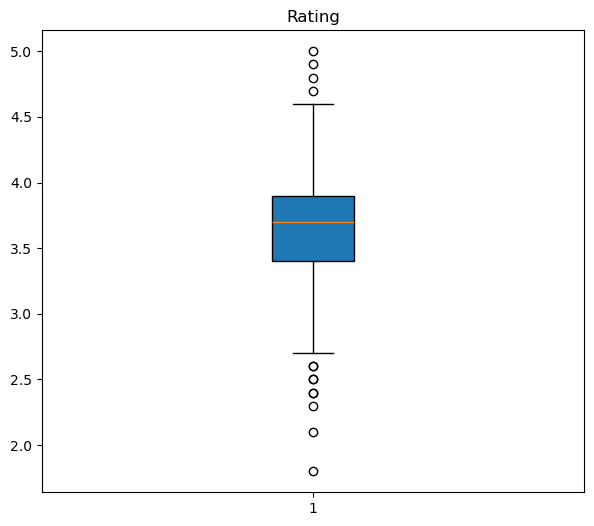

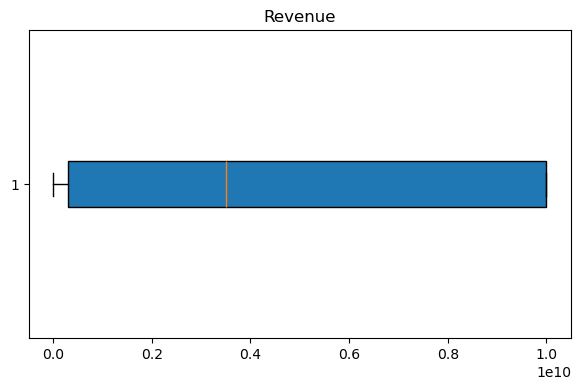

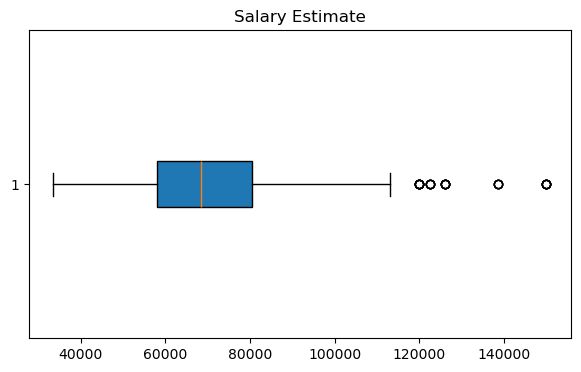

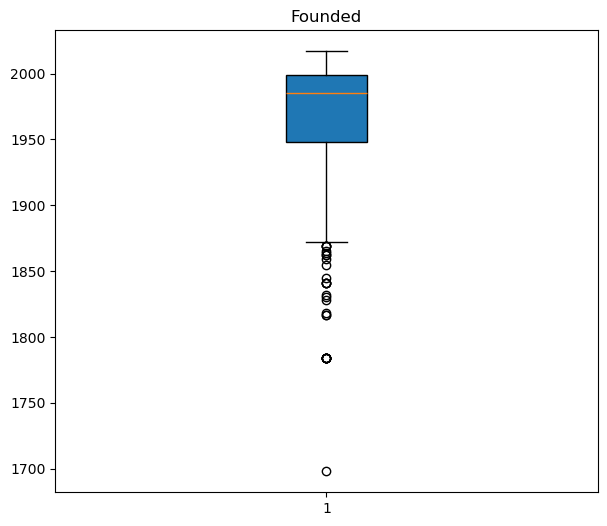

In [18]:
# check if quantitative variables have outliers.

#Checking for outliers in Rating
fig = plt.figure(figsize =(7, 6))
plt.boxplot(df['Rating'],patch_artist=True)
plt.title("Rating")
plt.show()

#Checking for outliers in Revenue
fig = plt.figure(figsize =(7,4))
plt.boxplot(df['Revenue'], vert=False, patch_artist=True, showfliers=True)
plt.title("Revenue")
plt.show()

#Checking for outliers in Salary
fig = plt.figure(figsize =(7, 4))
plt.boxplot(df['Salary Estimate'], vert=False, patch_artist=True)
plt.title("Salary Estimate")
plt.show()

#Checking for outliers in Founded
fig = plt.figure(figsize =(7, 6))
plt.boxplot(df['Founded'],patch_artist=True)
plt.title("Founded")
plt.show()

### 2-6. Generating Plot(s)
Explaining the distribution of Rating, Revenue and Salary Estimate in the dataset using Histograms. 

*Observations*:
We observe that the ratings are normally distributed. 

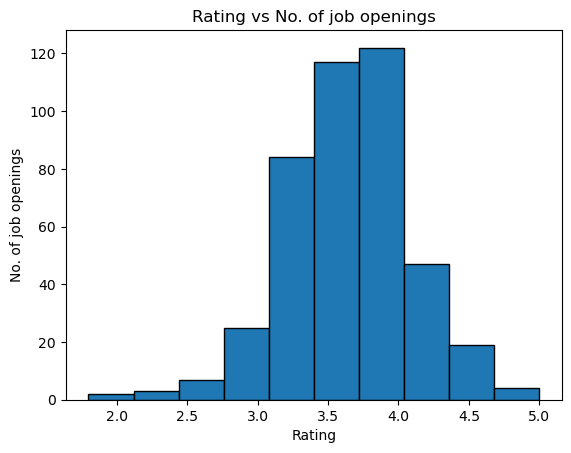

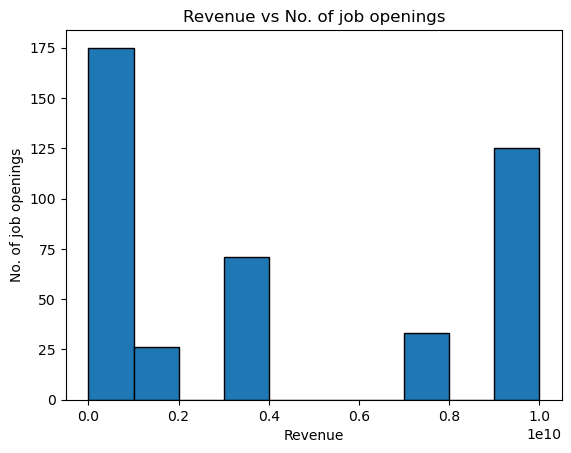

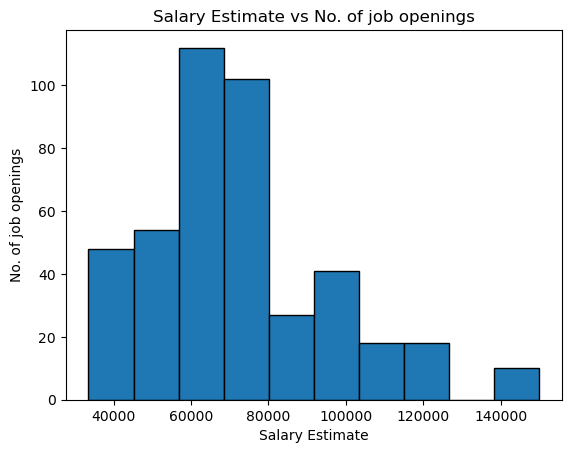

In [19]:
# generate plots to support your objective and goals
hist_data = plt.hist(df['Rating'], edgecolor='black')
plt.title("Rating vs No. of job openings")
plt.xlabel("Rating")
plt.ylabel("No. of job openings")
plt.show()

hist_data = plt.hist(df['Revenue'], edgecolor='black')
plt.title("Revenue vs No. of job openings")
plt.xlabel("Revenue")
plt.ylabel("No. of job openings")
plt.show()

hist_data = plt.hist(df['Salary Estimate'], edgecolor='black')
plt.title("Salary Estimate vs No. of job openings")
plt.xlabel("Salary Estimate")
plt.ylabel("No. of job openings")
plt.show()

## Correlation Heatmap
- Founded vs. Revenue: Shows a moderate negative correlation (-0.44), suggesting that older companies might have lower revenue compared to newer ones.
- Rating and Salary Estimate: Minimal correlation, indicating that company ratings do not strongly influence salary estimates.
- Easy Apply: Slight positive correlation with ratings and founded year, suggesting that newer companies with higher ratings might offer easier application processes.

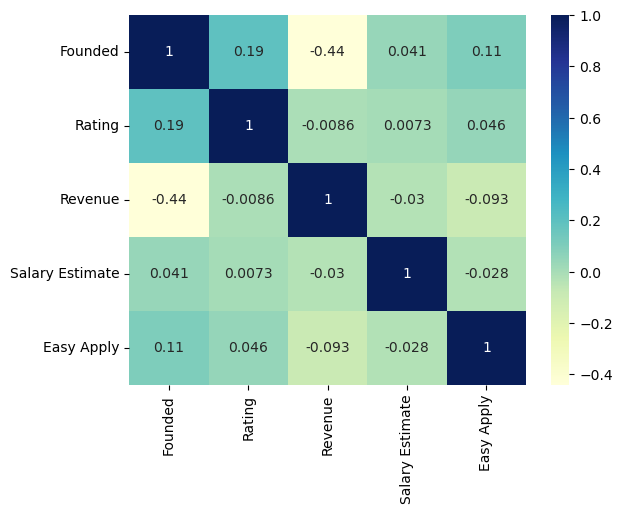

In [20]:
# generate plots to support your objective and goals

#Heatmap to show correlation between quantitative variables
sns.heatmap(df[['Founded','Rating','Revenue','Salary Estimate','Easy Apply']].corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

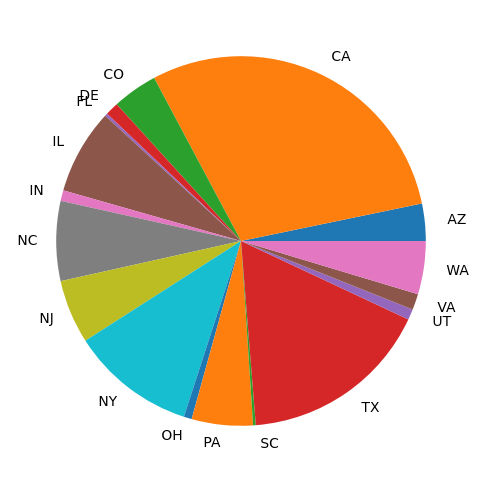

In [21]:
#Pie-chart to understand distribution of locations in the Dataset.
fig = plt.figure(figsize =(8, 6))
loc = df.groupby('Location')['Location'].count()
plt.pie(loc, labels=loc.index)
plt.show()

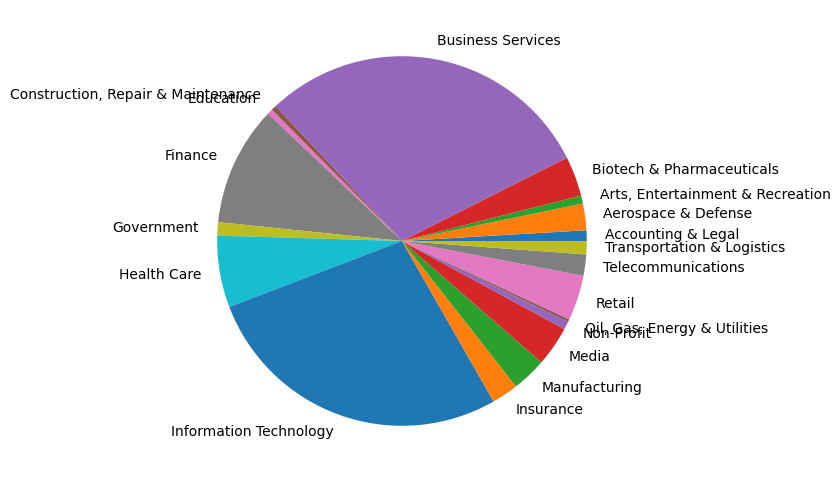

In [22]:
#Pie-chart to show which Sector has more need for Data Analysts
fig = plt.figure(figsize =(8, 6))
loc = df.groupby('Sector')['Sector'].count()
plt.pie(loc, labels=loc.index)
plt.show()

## 3. EDA


In [23]:
# perform your EDA

## Question 1
### What is average market standard of salary provided for Data Analyst jobs and which job title pays more?

## Average Salary
This boxen plot shows the distribution of Salary Estimate for data analyst jobs. The average salary for data analysts jobs is between 60K-80K annually with a minimim of 40K and a maximum of 140K. The width of the boxes indicates job concentration at different salary levels, while the outliers, represented as dots, highlight a few high-paying positions exceeding $140,000.

This plot helps visualize how salary estimates are distributed and highlights the general salary range as well as the rare high-paying opportunities.

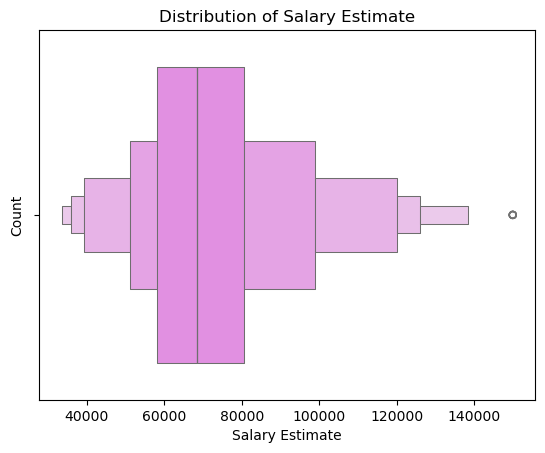

In [24]:
# Average Salary

sns.boxenplot(x='Salary Estimate', data=df, color='violet')
plt.xlabel('Salary Estimate')
plt.ylabel('Count')
plt.title('Distribution of Salary Estimate')
plt.show()

## Average Salary by Job Title

From the bar graph we can see that the top 10 demanding job roles are:
1. Data Analyst
2. Senior Data Analyst
3. Junior Data Analyst
4. Business Data Analyst
5. Data Reporting Analyst
6. Data Governance Analyst
7. Data Quality Analyst
8. Data Wahrehouse Analyst
9. Lead Data Analyst
10. Senior Business Data Analyst


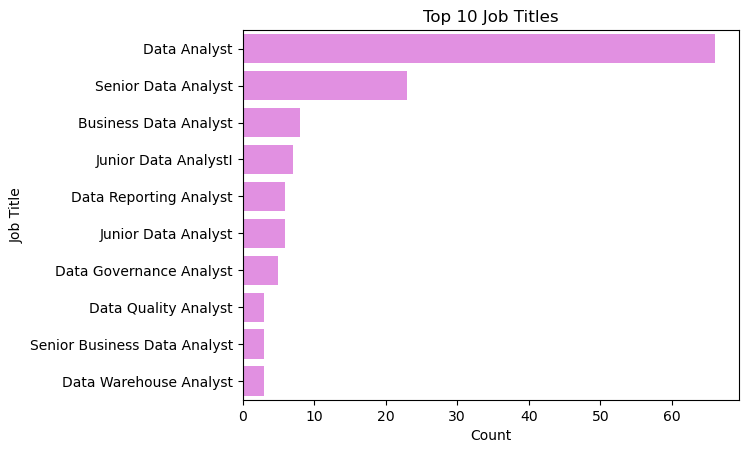

In [25]:
#Finding top 10 demanding jobs roles in data analytics
top_jobs = df['Job Title'].value_counts().head(10)

sns.barplot(x=top_jobs.values, y=top_jobs.index, color='violet')

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')
plt.show()

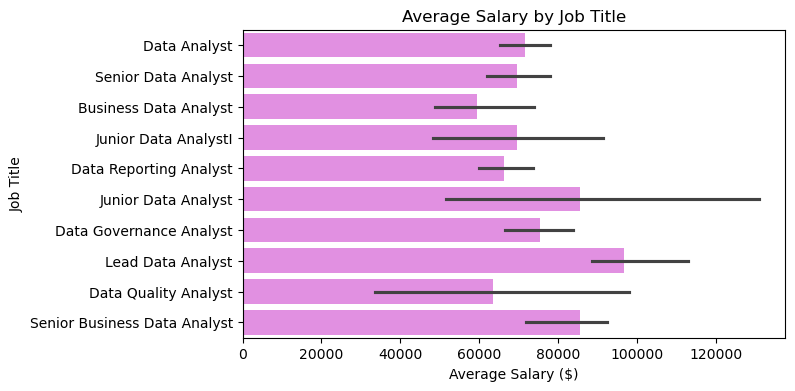

In [26]:
#Based on Salary which Job Title pays more

d_sorted = df.sort_values(by='Salary Estimate', ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x='Salary Estimate', y='Job Title', data=d_sorted, orient='h', order=d_sorted['Job Title'].value_counts().head(10).index, color='violet')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

### Observations:

- Eventhough the dataset shows that there is a massive demand for Data Analysts in the market but when it comes to salary, the Data Analysts are paid on an average between 60k-80k($).
- There is a huge gap in job availability between the positions of Data Analyst and Senior Data Analyst, which are the two most sought-after positions in the industry.
- The dataset also shows that the highest-paying job in the industry is Lead Data Analyst, which pays above 80,000 USD per year but lacks job availability.

## Question 2
### Which State pays more to the Data Analysts and what is the average salary paid in those top States?

## State-wise Average Salary
This bar plot displays the average salary for data analyst positions across different U.S. states.
- California (CA) stands out with the highest average salary, exceeding 140k dollars while Utah (UT) has the lowest, around 40k dollars.
- States like New York (NY), New Jersey (NJ), and Illinois (IL) show higher average salaries around 100k dollars while several states, including Texas (TX) and Virginia (VA), have moderate salaries between 80k dollars and 100k dollars.
- This plot highlights significant geographical variations in salary estimates for data analyst roles.

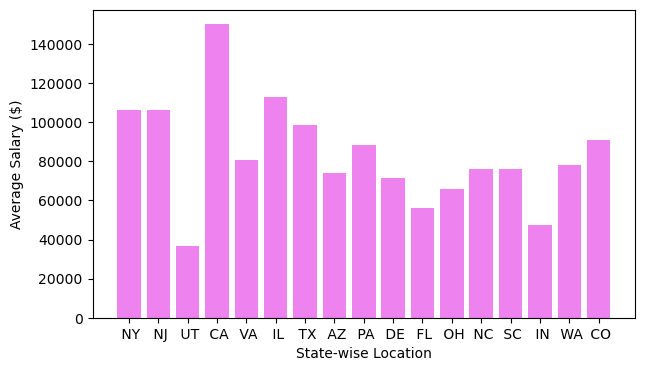

In [27]:
#Salary trends by location
plt.figure(figsize=(7, 4))
plt.bar(df['Location'], df['Salary Estimate'], color='violet')
plt.xlabel('State-wise Location')
plt.ylabel('Average Salary ($)')
plt.show()

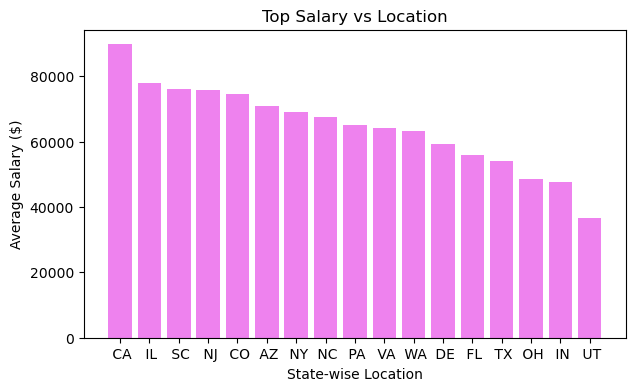

In [28]:
# Grouping the data by location and finding the average salary
location_avg_salary = df.groupby('Location')['Salary Estimate'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(7, 4))
plt.bar(location_avg_salary.index, location_avg_salary, color='violet')
plt.xlabel('State-wise Location')
plt.ylabel('Average Salary ($)')
plt.title('Top Salary vs Location')
plt.show()


## Observations
This bar chart visualizes the average salary by U.S. state, based on the given dataset. The states are sorted in descending order of average salary. Some key insights from this chart include:

- California (CA) offers the highest average salary, with over 80k dollars.
- Illinois (IL), South Carolina (SC), New Jersey (NJ), and Colorado (CO) follow closely behind, all offering average salaries near 75k dollars to 80k dollars.
- States like Texas (TX), Indiana (IN), Ohio (OH), and Utah (UT) appear on the lower end of the salary scale, offering salaries below 65k dollars.
- There is a noticeable salary disparity across locations, highlighting that location plays a significant role in determining compensation.
- This chart underscores the importance of geographic location in job opportunities and salary potential for data analytics roles.

C:\Users\kpraj\AppData\Local\Temp\ipykernel_19588\427011457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Salary Estimate', data=df_top_5_states, palette='Purples')


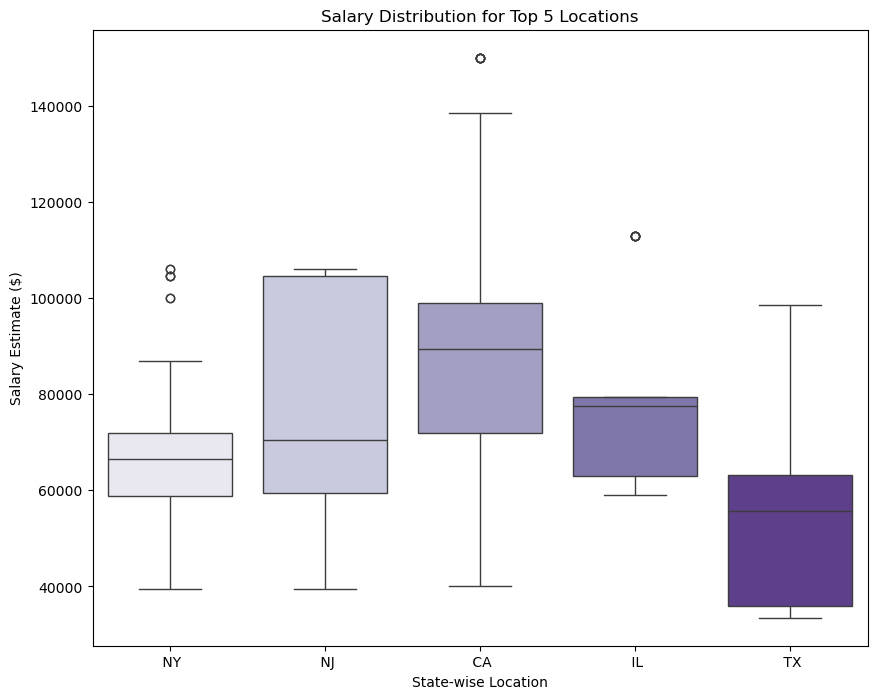

In [29]:
# Find the top 5 locations with the highest max salary
top_5_states = df.groupby('Location')['Salary Estimate'].max().sort_values(ascending=False).head(5).index

# Filter the dataframe for those top 5 states
df_top_5_states = df[df['Location'].isin(top_5_states)]

# Plot the boxplot for top 5 states
plt.figure(figsize=(10, 8))
sns.boxplot(x='Location', y='Salary Estimate', data=df_top_5_states, palette='Purples')

# Adding labels and title
plt.xlabel('State-wise Location')
plt.ylabel('Salary Estimate ($)')
plt.title('Salary Distribution for Top 5 Locations')

plt.show()


## Observations
- New Jersey (NJ) has the highest median salary and a wide range of salaries.- 
California (CA) also shows a high median salary with a broad range and some outliers.- 
New York (NY) has a lower median salary compared to NJ and CA, with several outliersn the higher end.
- Illinois (IL)IL) and Texas (TX) have lower median salaries compared to the other states, with TX showing a wider range of salaries.

## Question 3
### Would moving to States paying higher salaries, guarantee a better job rating?

C:\Users\kpraj\AppData\Local\Temp\ipykernel_19588\353206326.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Rating', data=df_top_5_states, palette='Purples')


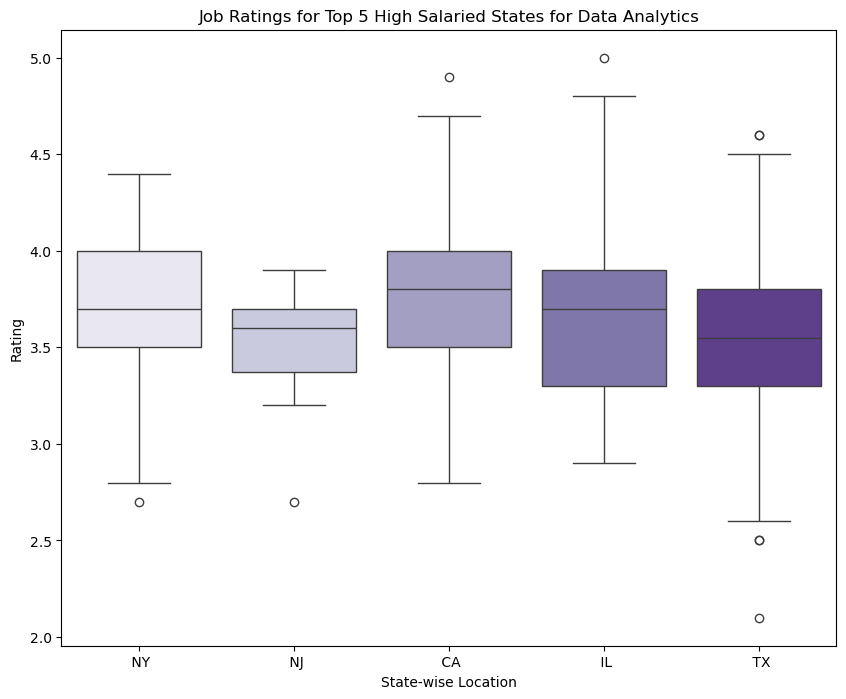

In [30]:
#Does working in states with high paying jobs gurantee better job ratings

# Find the top 5 locations with the highest max salary
top_5_states = df.groupby('Location')['Salary Estimate'].max().sort_values(ascending=False).head(5).index

# Filter the dataframe for those top 5 states
df_top_5_states = df[df['Location'].isin(top_5_states)]

# Plot the boxplot for top 5 states
plt.figure(figsize=(10, 8))
sns.boxplot(x='Location', y='Rating', data=df_top_5_states, palette='Purples')

# Adding labels and title
plt.xlabel('State-wise Location')
plt.ylabel('Rating')
plt.title('Job Ratings for Top 5 High Salaried States for Data Analytics')

plt.show()

## Observations
From this it can be observed that although Texas does not pay as much as New York and California but in terms of job rating TX lies in the same range as NY and CA. Therefore, from the graph it can be infered that job ratings does not depend on the average pay.

- California stands out for having both high job ratings and competitive salaries, suggesting it might be an attractive location for data analytics professionals.- 
New Jersey offers high salaries but lower job ratings, which could indicate potential dissatisfaction despite financial incentives
- 
Texas shows moderate job ratings and lower salaries, suggesting it might be less competitive compared to other states in terms of compensation.

## Question 4
### What are the top 5 sectors in Data Analytics with the most job openings?

The top 5 sectors with maximum number of Data Analyst job openings are:
1. Business Services
2. Information Technology
3. Finance
4. Health Care
5. Retail

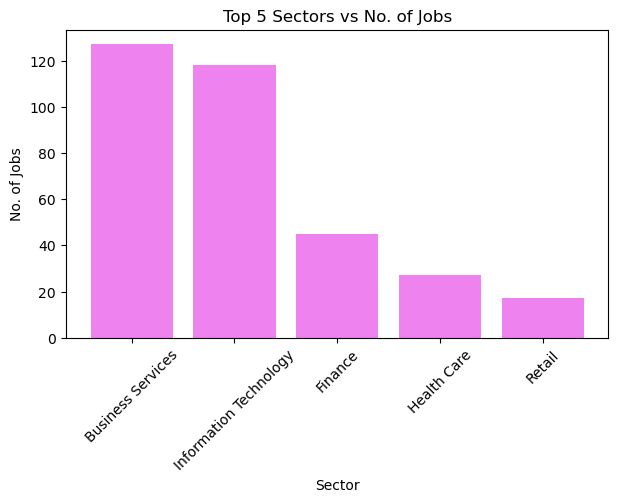

In [31]:
# Top 5 sectors with job openings
sector_openings = df.groupby('Sector')['Sector'].count().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(7, 4))
plt.bar(sector_openings.index, sector_openings, color='violet')
plt.xlabel('Sector')
plt.ylabel('No. of Jobs')
plt.title('Top 5 Sectors vs No. of Jobs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

## Observations
- Business Services and Information Technology: Dominant sectors with the highest number of jobs, both exceeding 100 positions.- 
Finance: Moderate number of jobs, significantly fewer than the top two sectors
- 
Health Care and Retail: Least number of jobs among the top five sectors.

## Question 5
### What is the trend of salary for the most demanding sectors in Data Analytics?

C:\Users\kpraj\AppData\Local\Temp\ipykernel_19588\799037868.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Salary Estimate', data=df_top_5_sectors, palette='Purples')


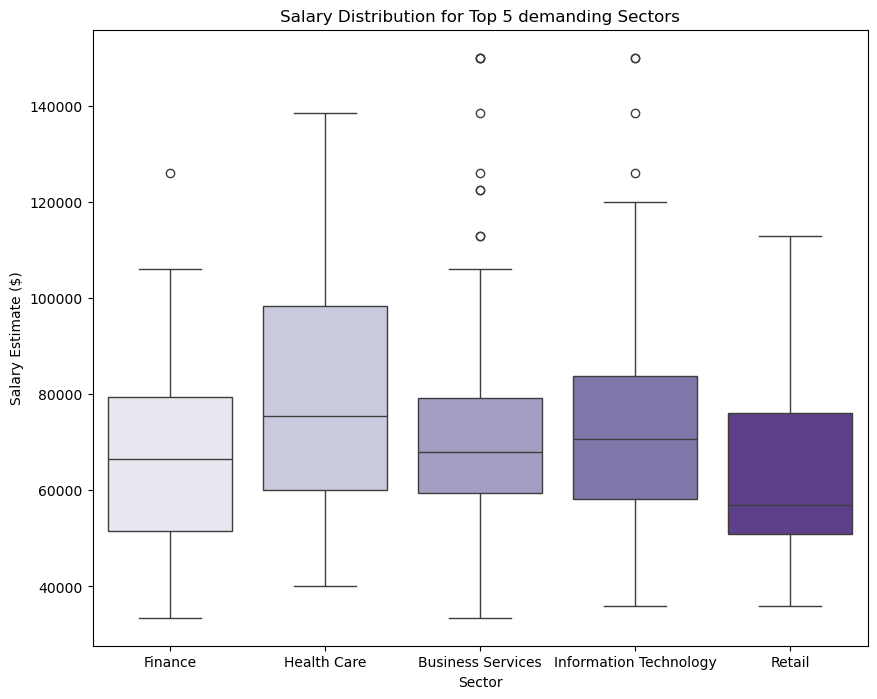

In [32]:
top_5_sectors = df.groupby('Sector')['Sector'].count().sort_values(ascending=False).head(5).index

# Filter the dataframe for those top 5 states
df_top_5_sectors = df[df['Sector'].isin(top_5_sectors)]

# Plot the boxplot for top 5 states
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sector', y='Salary Estimate', data=df_top_5_sectors, palette='Purples')

# Adding labels and title
plt.xlabel('Sector')
plt.ylabel('Salary Estimate ($)')
plt.title('Salary Distribution for Top 5 demanding Sectors')

plt.show()


## Observations
- Health Care: Highest median salary with a wide range, indicating lucrative opportunities.- 
Information Technology and Business Services: Similar salary distributions with several high outliers, suggesting potential for high earning.
- 
Finance: Moderate median salary with some high outlier
- .
Retail: Lowest median salary among the sectors, with a narrower range.

## 4. Conclusion 

### Question 1: What is average market standard of salary provided for Data Analyst jobs and which job title pays more?

- **Salary Concentration**: The majority of data analyst positions offer salaries between 60,000 USD and 80,000 USD annually. This suggests that while there is strong demand, the compensation tends to be concentrated within this mid-range, reflecting the industry’s norm for most roles.
- **Limited High-Paying Roles**: Though there are some roles exceeding 140,000 USD they are outliers. These high-paying jobs, such as Lead Data Analyst positions, are rare and do not represent the majority of opportunities in the market.
- **Gap Between Roles**: There is a notable gap in both salary and job availability between Data Analyst and Senior Data Analyst roles. This indicates that while entry- to mid-level data analyst positions are abundant, moving to more senior roles with significantly higher salaries is more competitive and less frequent.
- **Job Availability vs. Salary**: Despite high demand for data analysts, the salaries for these positions remain relatively moderate. The scarcity of higher-paying roles suggests that salary growth may be limited unless analysts move into more senior or specialized positions like Lead Data Analyst.

### Question 2: Which State pays more to the Data Analysts and what is the average salary paid in those top States?
- **Geographical Salary Disparity**: There is a significant variation in data analyst salaries across U.S. states. States like California (CA), New York (NY), and New Jersey (NJ) offer the highest average salaries, often exceeding 100,000 USD while states like Utah (UT) and Texas (TX) are on the lower end, with salaries below 65,000USD. This highlights the importance of location in determining salary potential for data analyst roles.
- **California’s Salary Leadership**: California stands out as the state with the highest average salary for data analysts, exceeding $140,000. This could be due to the tech industry’s strong presence in the state, particularly in regions like Silicon Valley, which drives up compensation.
- **Salary Gaps Between States**: States like New Jersey (NJ) and Illinois (IL) offer relatively high salaries, but there is still a notable gap between these states and California. Meanwhile, states like Texas (TX) and Indiana (IN) have much lower salary averages, indicating that geography plays a pivotal role in salary determination.
- **Wide Salary Ranges**: Some states, such as New Jersey and California, show a wide range of salary estimates, suggesting that there are both high-paying and lower-paying opportunities within these regions. These wide salary bands may indicate the presence of both junior and highly experienced roles.
- **Lower Salaries in Central U.S.**: States like Ohio (OH), Indiana (IN), and Utah (UT) are consistently on the lower end of the salary spectrum, with average salaries below 65,000 USD. This indicates that the cost of living and the demand for data analysts may be lower in these regions compared to coastal states.

### Question 3: Would moving to States paying higher salaries, guarantee a better job rating?
- **Job Ratings Are Independent of Salary**: The comparison shows that job ratings do not necessarily correlate with salary levels. For instance, Texas (TX), despite offering lower salaries than California (CA) and New York (NY), has similar job ratings, suggesting that factors other than pay, such as work-life balance or job satisfaction, influence employee ratings.
- **California’s Balanced Appeal**: California stands out as an attractive destination for data analysts, offering both high salaries and strong job ratings. This balance suggests that the state provides a competitive combination of compensation and favorable working conditions, making it a desirable location for professionals in the field.
- **New Jersey’s Pay-Rating Mismatch**: New Jersey (NJ) offers high salaries but lower job ratings, indicating that even though professionals may be well-compensated, there could be underlying dissatisfaction with factors such as job culture, benefits, or work-life balance.
- **Texas’ Moderate Performance**: Texas offers moderate job ratings despite lower salaries, suggesting it may be less competitive financially compared to other states, but the overall job satisfaction remains similar to higher-paying regions. This could make Texas appealing for professionals prioritizing job satisfaction over pay.
- **Satisfaction Over Pay**: The overall analysis reinforces that higher salaries do not necessarily guarantee higher job satisfaction, as seen in states like New Jersey and California. Conversely, lower-paying regions, like Texas, may still offer satisfying work environments despite offering less competitive salaries.

### Question 4: What are the top 5 sectors in Data Analytics with the most job openings?
- **Business Services and Information Technology Lead**: Business Services and Information Technology are the dominant sectors for data analyst job openings, each exceeding 100 positions. This indicates strong demand for data analysts in these fields, likely due to the ongoing digital transformation and the increasing reliance on data-driven decision-making in these industries.
- **Finance Shows Moderate Demand**: The Finance sector has a moderate number of job openings, falling behind Business Services and IT but still providing significant opportunities for data analysts. This may reflect the growing need for data-driven insights in areas like investment analysis, risk management, and financial forecasting.
- **Health Care and Retail Lag Behind**: Health Care and Retail sectors have the fewest job openings among the top five, suggesting that while data analytics is important in these industries, the demand for such roles is not as high as in Business Services or IT. However, these sectors still offer opportunities, particularly as the adoption of data analytics continues to expand in areas like patient care optimization and customer behavior analysis.
- **Sector-Specific Demand**: The concentration of job openings in Business Services and IT highlights how different sectors are at varying stages of integrating data analytics into their operations. Industries like Health Care and Retail, though offering fewer positions, may still experience growth in demand for data analysts as these sectors catch up with data adoption trends.
- **Implications for Job Seekers**: For data analysts seeking job opportunities, focusing on Business Services and Information Technology could offer the best chances of finding employment, while positions in Finance, Health Care, and Retail may be more limited but could provide specialized roles.

### Question 5: What is the trend of salary for the most demanding sectors in Data Analytics?
- **Health Care Offers the Highest Salaries**: Health Care stands out with the highest median salary and a wide salary range, indicating that data analysts in this sector have access to some of the most lucrative opportunities. The wide range also suggests variability, meaning professionals in specialized roles or with higher experience may command significantly higher pay.
- **Information Technology and Business Services Show Similar Salary Patterns**: Both Information Technology and Business Services offer similar salary distributions, with several high outliers. This indicates potential for high earnings, especially for senior or specialized data analyst positions, even though the median salary might not be as high as in Health Care.
- **Finance Sector**: Moderate Salaries with High-Paying Roles: The Finance sector offers a moderate median salary, but it also has several high outliers, suggesting that while most data analysts in finance may earn moderate pay, there are opportunities for significant earnings in certain roles, such as risk analysis or investment-related positions.
- **Retail Offers the Lowest Salaries**: Retail has the lowest median salary among the sectors, with a narrower salary range. This suggests fewer high-paying opportunities, making it the least financially competitive sector for data analysts. However, it may still offer stable, entry-level roles with room for growth.
- **Salary Variability by Sector**: The analysis highlights that the Health Care and IT sectors offer the most lucrative opportunities for data analysts, while sectors like Retail may provide more constrained salary growth. For those seeking high earning potential, Health Care and specialized roles in IT and Finance may be the most attractive.



## 5. Summary

The dataset reveals a growing demand for data analysts, with the highest number of job opportunities available for this role, followed closely by senior data analysts. The average salary for data analytics positions ranges between 60,000 USD and 80,000 USD per year. The highest-paying position in the field is the lead data analyst, with an annual salary exceeding 80,000 USD.

The sectors offering the most job opportunities are Business Services and Information Technology, followed by Finance, Health Care, and Education. This trend indicates that the IT sector, along with industries such as business, finance, health care, and retail, are managing large volumes of data and, therefore, driving demand for data analysts.

Interestingly, while Health Care offers higher average salaries for data analytics roles, Business Services and Information Technology are not at the top in terms of compensation.

In terms of geographic distribution, top locations for data analytics jobs include California, New York, New Jersey, Illinois, and Texas. The majority of these job openings are in the private sector, particularly in health care, business, IT, and finance. Although the Pharmaceutical industry tends to offer higher salaries, Business Services leads in terms of the sheer number of job opportunities.

Looking ahead, the future of data analytics is bright. The ever-increasing volume of data being generated suggests that opportunities for data analysts will continue to expand.

## References

> https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

> https://www.datacamp.com/blog/what-is-data-analysis-expert-guide